In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [4]:
X , y = make_regression (n_samples = 100 , n_features = 1 , n_informative = 1 , n_targets = 1 ,noise = 80 , random_state = 1 )

In [5]:
print(X.shape)
print(y.shape)

(100, 1)
(100,)


In [9]:
for i in range (100):
  print(X[i], y[i] , sep = '\t')

[-0.61175641]	-74.02883724213672
[-0.24937038]	17.732498713554094
[0.48851815]	-27.256027863509303
[0.76201118]	219.87756040552296
[1.51981682]	209.35461534296599
[0.37756379]	41.73522383440638
[0.51292982]	7.864586994855813
[-0.67124613]	58.98199414746533
[-1.39649634]	-60.4207242102117
[0.31563495]	18.78710394730587
[-0.63699565]	-28.117996971150134
[-0.39675353]	62.71152150335752
[-1.10061918]	-114.76703949327118
[0.90085595]	-72.49646988319813
[-1.09989127]	-82.85202759881479
[0.82797464]	70.19869896727954
[-0.07557171]	-36.44814352315399
[-0.35224985]	-136.47488535840398
[-0.67066229]	-98.97245504791505
[-1.07296862]	42.00070858858503
[-0.30620401]	-41.19887788471865
[2.18557541]	186.14341345569608
[0.86540763]	50.793309962416544
[0.19829972]	58.65863206437419
[-0.38405435]	18.807797265074157
[-0.68372786]	-0.4440707471672951
[0.05080775]	-8.878849799911304
[0.58281521]	37.12865236992517
[1.25286816]	160.580325286865
[-0.75439794]	-75.81564772427974
[-0.34934272]	-19.1381893922967

Text(0, 0.5, 'y')

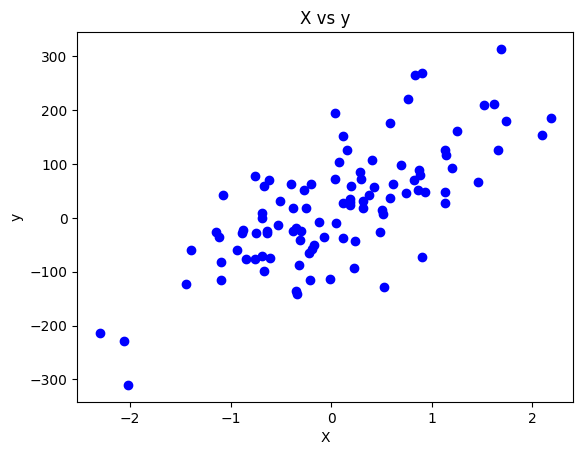

In [14]:
plt.scatter (X,y,c='blue')
plt.title('X vs y')
plt.xlabel('X')
plt.ylabel('y')

In [15]:
# train test split

x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 2)

In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(80, 1)
(80,)
(20, 1)
(20,)


In [18]:
reg = LinearRegression()

In [19]:
reg.fit(x_train , y_train )

LinearRegression()

In [20]:
y_pred = reg.predict(x_test)
y_pred

array([  7.03235197,  -8.7217216 , 129.14945002, -11.81276028,
        15.65733304,  40.04533032,  65.8890122 ,  74.28607864,
       133.95367204, 102.60731136,   5.3041459 , -24.64628096,
        21.25915324, -75.55737388, -32.08941759, 217.01038828,
        90.24331337, -44.79151339,  32.98453364, 177.76079446])

In [21]:
r2_score(y_test,y_pred)

0.5008037988909309

In [24]:
reg.coef_

array([89.04907315])

In [23]:
reg.intercept_

22.386924038220414

In [140]:
class GDRegressor :

  def __init__(self , learning_rate = 0.01 , epochs = 100):
    self.m = 100    # ideal value for coef
    self.b = -200    # ideal value for intercept
    self.lr = learning_rate
    self.epochs = epochs


  def fit(self , x_train , y_train):

    for i in range(self.epochs):
      b_slop = -2 * np.sum( y_train - self.m * x_train.ravel() - self.b)
      m_slop = -2 * np.sum( (y_train - self.m * x_train.ravel() - self.b)* x_train.ravel()  )

      self.b = self.b - (self.lr * b_slop)
      self.m = self.m - (self.lr * m_slop)
      # print(self.m , self.b)

    print (self.m , self.b)

  def predict (self , x_test ):
    return self.m * x_test + self.b

In [141]:
gdr = GDRegressor(learning_rate=0.001 , epochs = 50)

In [142]:
gdr.fit(x_train,y_train )

89.07274847810709 22.349652101134645


In [143]:
r2_score(y_test , gdr.predict(x_test))

0.5010076255690169

In [144]:
reg.coef_ , reg.intercept_

(array([89.04907315]), 22.386924038220414)